In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
dataframe = pd.read_csv("country_wise_latest.csv")

In [4]:
dataframe.shape

(187, 15)

In [5]:
dataframe.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

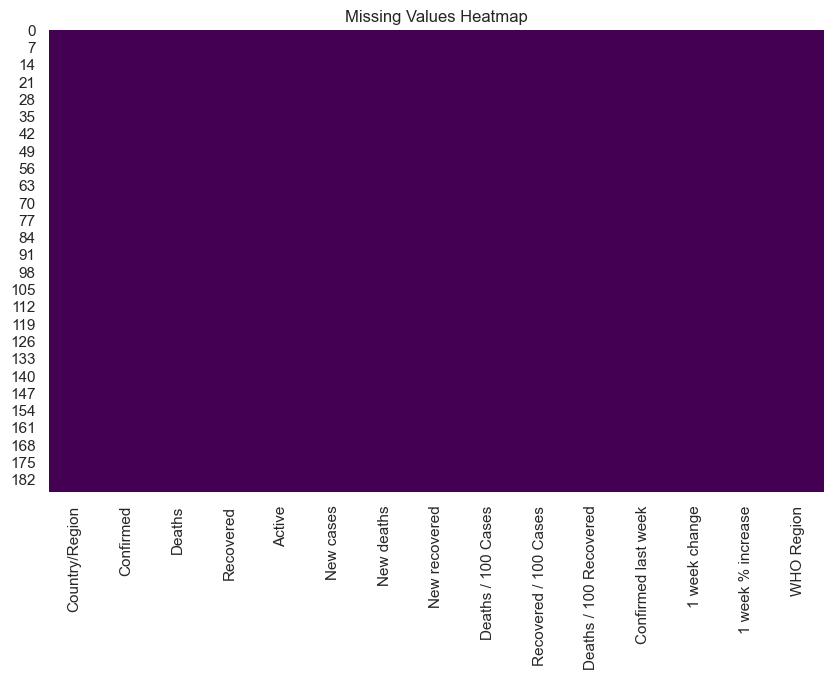

In [7]:
sns.heatmap(dataframe.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
dataframe.fillna(0, inplace=True)


In [9]:
dataframe.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
dataframe.isnull().sum()


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [11]:
dataframe.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [12]:
dataframe.tail

<bound method NDFrame.tail of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recov

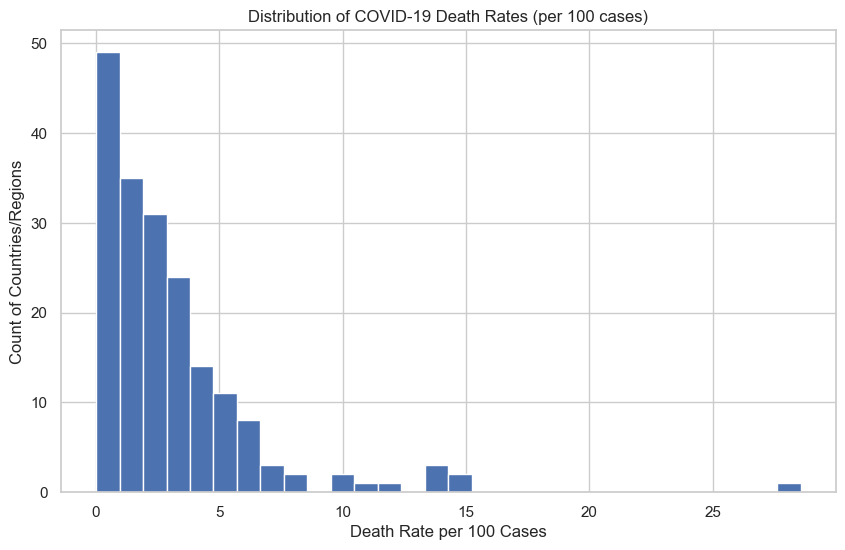

In [13]:
plt.figure(figsize=(10,6))
dataframe['Deaths / 100 Cases'].hist(bins=30)
plt.title("Distribution of COVID-19 Death Rates (per 100 cases)")
plt.xlabel('Death Rate per 100 Cases')
plt.ylabel('Count of Countries/Regions')
plt.show()

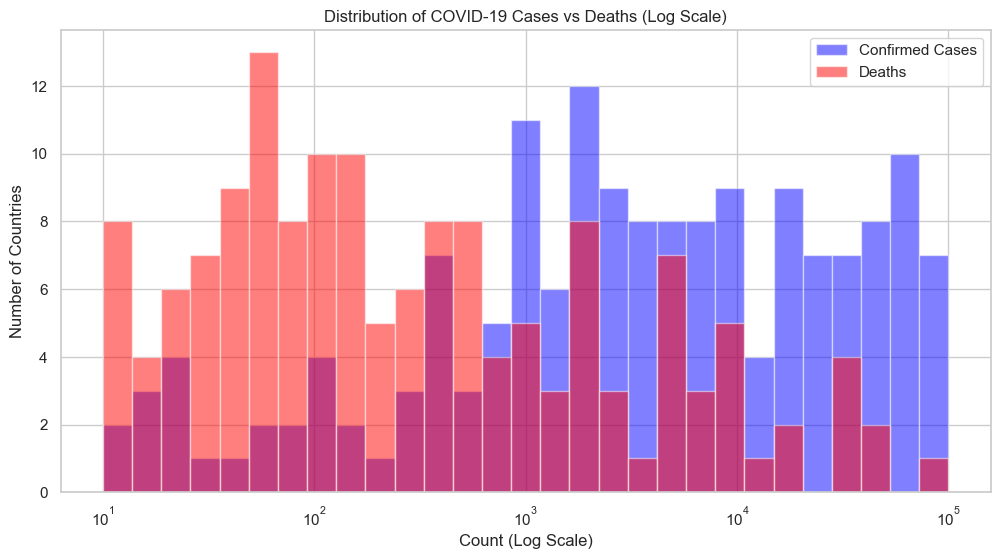

In [14]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Since the values are on different scales, we'll use log scale
bins = np.logspace(1, 5, 30)  # Logarithmic bins from 10 to 100,000

# Plot both histograms
plt.hist(dataframe['Confirmed'], bins=bins, alpha=0.5, label='Confirmed Cases', color='blue')
plt.hist(dataframe['Deaths'], bins=bins, alpha=0.5, label='Deaths', color='red')

# Formatting
plt.xscale('log')
plt.title('Distribution of COVID-19 Cases vs Deaths (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Number of Countries')
plt.legend()

# Add grid for better readability
# plt.grid(True, which="both", ls="--")
plt.show()

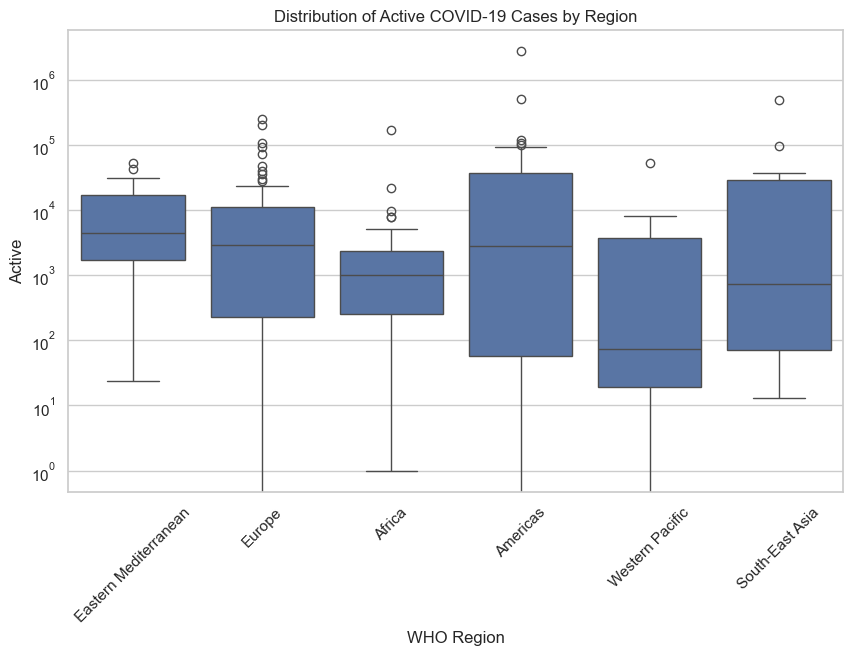

In [15]:
sns.boxplot(x='WHO Region', y='Active', data=dataframe)
plt.title("Distribution of Active COVID-19 Cases by Region")
plt.yscale('log')  # Using log scale due to large value ranges
plt.xticks(rotation=45)
plt.show()

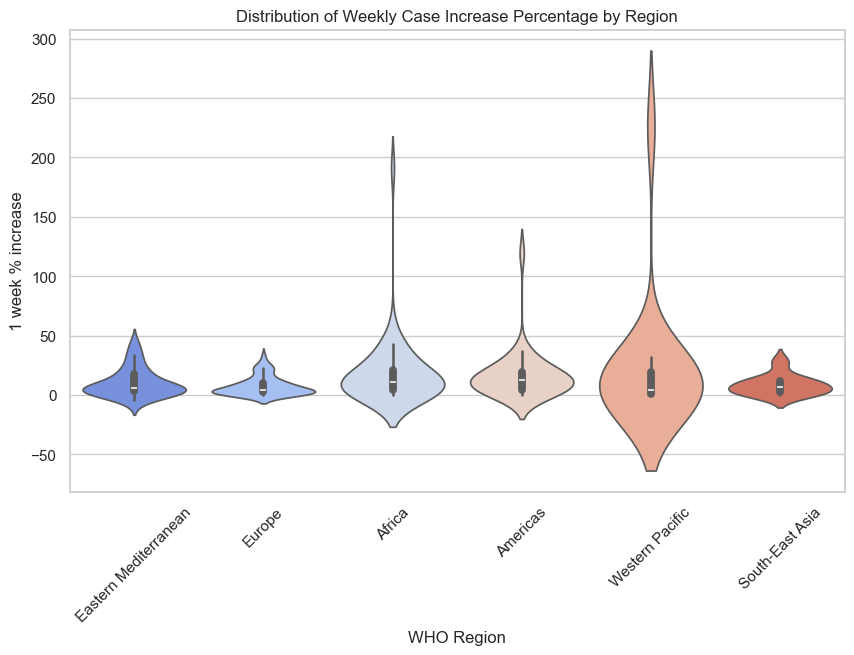

In [16]:
sns.violinplot(x='WHO Region', y='1 week % increase', data=dataframe, palette='coolwarm')
plt.title('Distribution of Weekly Case Increase Percentage by Region')
plt.xticks(rotation=45)
plt.show()

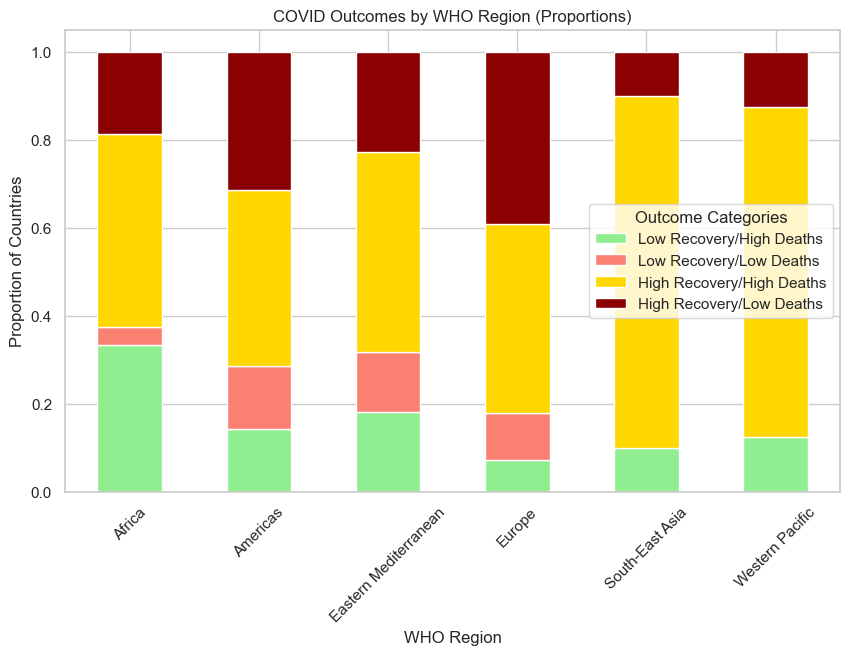

In [17]:
# Stacked bar plot of Recovery vs Death Rates by WHO Region
pd.crosstab(dataframe['WHO Region'], 
            [dataframe['Recovered / 100 Cases'] > 50,  # Boolean for good recovery
             dataframe['Deaths / 100 Cases'] > 3],     # Boolean for high mortality
            normalize='index').plot(kind='bar', 
                                   stacked=True,
                                   color=['lightgreen', 'salmon', 'gold', 'darkred'])
plt.title('COVID Outcomes by WHO Region (Proportions)')
plt.ylabel('Proportion of Countries')
plt.legend(['Low Recovery/High Deaths', 'Low Recovery/Low Deaths',
            'High Recovery/High Deaths', 'High Recovery/Low Deaths'],
           title='Outcome Categories')
plt.xticks(rotation=45)
plt.show()